## Data Import 

In [708]:
import pandas as pd 
import sklearn 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv('SeoulBikeData.csv', encoding='cp949')

## Data Exploration

In [711]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(캜)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(캜)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [713]:
df.shape

(8760, 14)

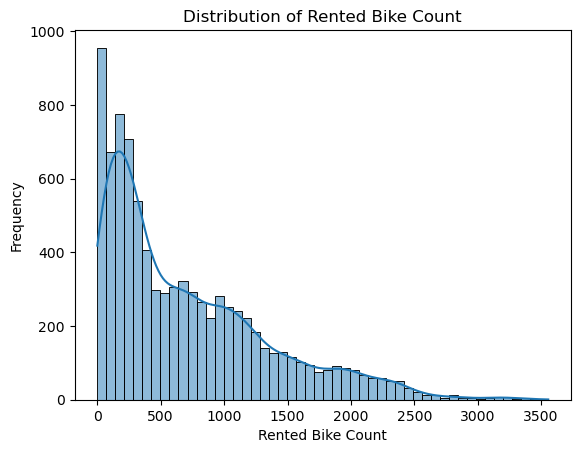

In [715]:
sns.histplot(df['Rented Bike Count'], bins=50, kde=True)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

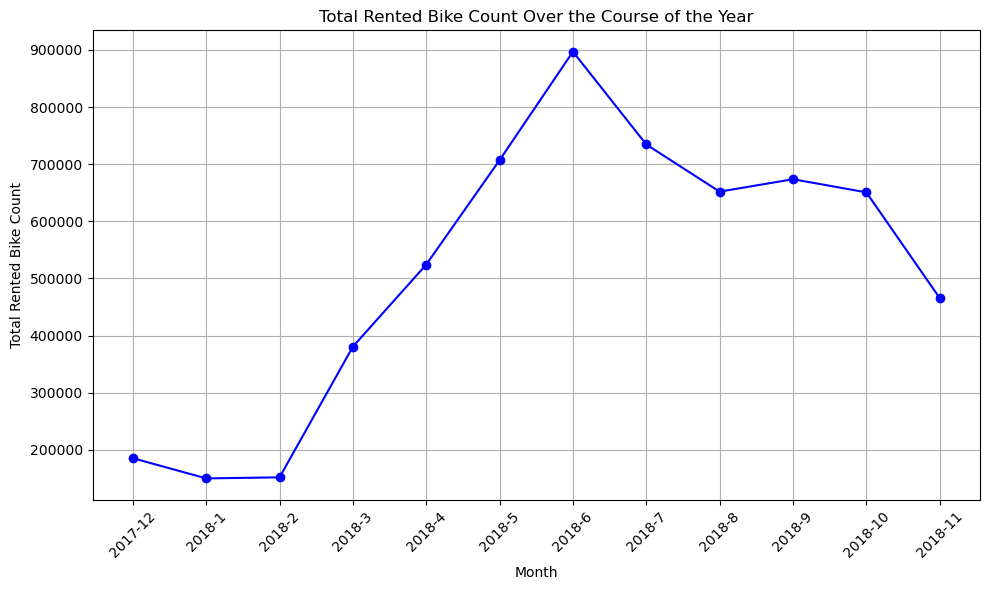

In [719]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

monthly_rentals = df.groupby(['Year', 'Month'])['Rented Bike Count'].sum().reset_index()

monthly_rentals['Year-Month'] = monthly_rentals['Year'].astype(str) + '-' + monthly_rentals['Month'].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(monthly_rentals['Year-Month'], monthly_rentals['Rented Bike Count'], marker='o', color='b')
plt.xticks(rotation=45)
plt.title('Total Rented Bike Count Over the Course of the Year')
plt.xlabel('Month')
plt.ylabel('Total Rented Bike Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [678]:
print(df.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [680]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Data Preprocessing

In [683]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

if 'Date' in df.columns:    
    df = df.drop('Date', axis=1)

df = pd.get_dummies(df, drop_first=True)

X = df.drop('Rented Bike Count', axis=1).values
y = df['Rented Bike Count'].values

X_trn, X_temp, y_trn, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_vld, X_tst, y_vld, y_tst = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_trn = scaler.fit_transform(X_trn)
X_vld = scaler.transform(X_vld)
X_tst = scaler.transform(X_tst)

In [685]:
df.head()


,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,False,False,True,True,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,False,False,True,True,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,False,False,True,True,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,False,False,True,True,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,False,False,True,True,True


In [687]:
print(df.columns)

Index(['Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes'],
      dtype='object')


In [689]:
df.shape

(8760, 15)

## K-Nearest Neighbors

In [692]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_trn, y_trn)

y_pred = knn.predict(X_tst)
mse = mean_squared_error(y_tst, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_tst, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")



Mean Squared Error: 93607.82
RMSE: 305.95
R^2 Score: 0.77


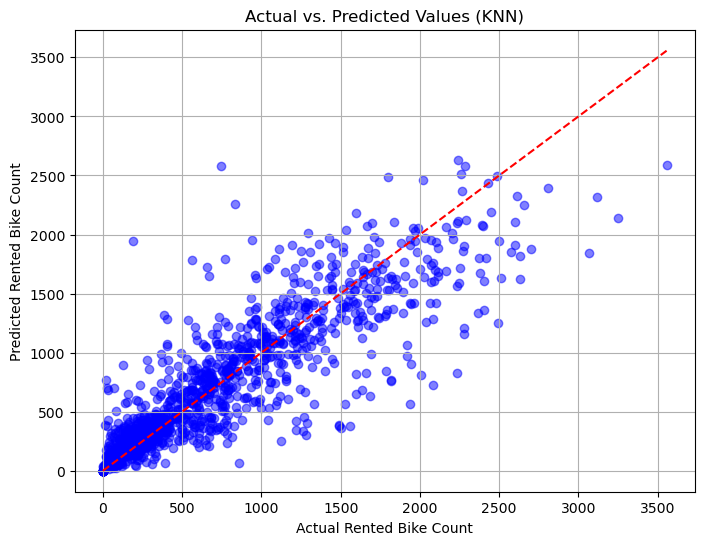

In [694]:
plt.figure(figsize=(8, 6))
plt.scatter(y_tst, y_pred, alpha=0.5, color='blue')
plt.plot([y_tst.min(), y_tst.max()], [y_tst.min(), y_tst.max()], color='red', linestyle='--')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs. Predicted Values (KNN)')
plt.grid(True)
plt.show()


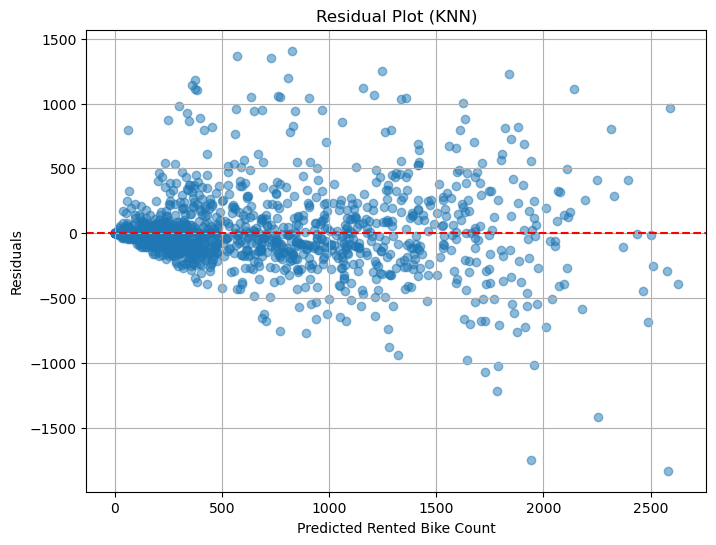

In [696]:
residuals = y_tst - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Rented Bike Count')
plt.ylabel('Residuals')
plt.title('Residual Plot (KNN)')
plt.grid(True)
plt.show()

 - If the point is above the zero line -> the model underestimated that value 
 - If the point is below the zero line -> the model overestimated that value

## Linear Regression

In [700]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_trn, y_trn)

y_pred_lr = linear_reg.predict(X_tst)

mse_lr = mean_squared_error(y_tst, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_tst, y_pred_lr)

print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R^2 Score: {r2_lr:.2f}")

Mean Squared Error: 186378.97
RMSE: 431.72
R^2 Score: 0.54


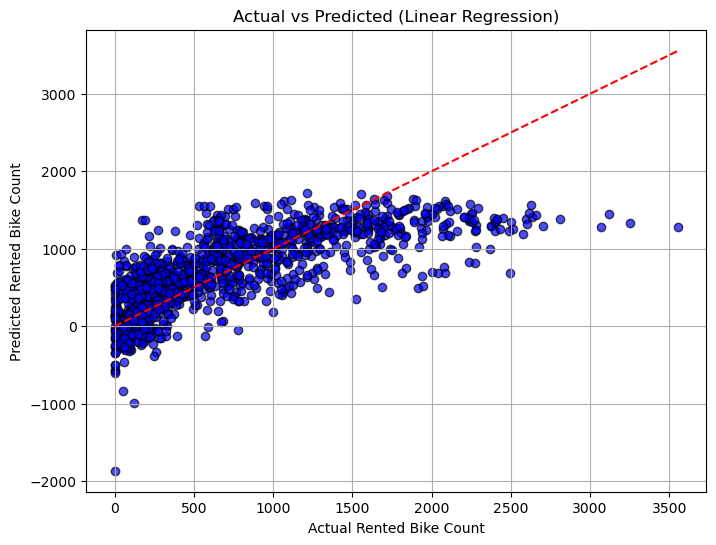

In [702]:
plt.figure(figsize=(8, 6))
plt.scatter(y_tst, y_pred_lr, color='blue', edgecolors='k', alpha=0.7)
plt.plot([y_tst.min(), y_tst.max()], [y_tst.min(), y_tst.max()], 'r--')
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.grid(True)
plt.show()

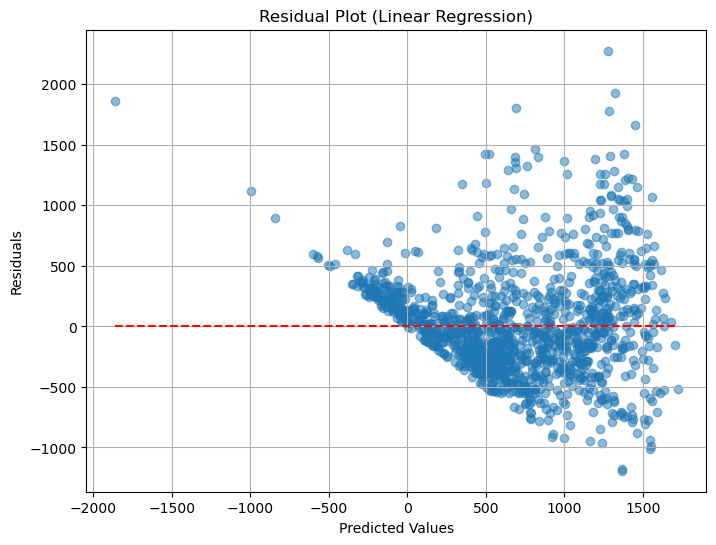

In [703]:
residuals = y_tst - y_pred_lr

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lr, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred_lr.min(), xmax=y_pred_lr.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Linear Regression)')
plt.grid(True)
plt.show()